# Boat Sales Task 6.5 Unserpervised Machine Learning: Clustering

In [1]:
#Importing Libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler
path= r'C:\Users\sdow\Desktop\Boat Analysis'
df= pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'df_clean2.csv'))

In [2]:
%matplotlib inline

# Data Cleaning

In [3]:
df.head()

Unnamed: 0            Boat Type          Manufacturer                 Type  \
0           0          Motor Yacht  Rigiflex power boats  new boat from stock   
1           1  Center console boat     Terhi power boats  new boat from stock   
2           2           Sport Boat    Pioner power boats  new boat from stock   
3           3         Fishing Boat    Linder power boats  new boat from stock   
4           4            Catamaran                  None   Used boat,Unleaded   

   Year Built  Length  Width       Material  Number of views last 7 days  \
0      2017.0    4.00   1.90           None                          226   
1      2020.0    4.00   1.50  Thermoplastic                           75   
2      2020.0    3.00   1.00           None                           64   
3      2019.0    3.55   1.46      Aluminium                           58   
4      1999.0    6.20   2.38      Aluminium                          474   

   EUR_price       Country              City  
0    3370.37  Switzerland       Lake Geneva   
1    3490.00      Germany        Bnningstedt  
2    3367.00      Denmark          Svendborg  
3    3399.00      Germany            Bayern   
4    3636.00  Switzerland    Neuenburgersee

In [4]:
# Drop the redundant columns and rename columns
df1 = df.drop(['Unnamed: 0'],axis = 1)
df1.rename(columns = {'Number of views last 7 days':'7days_views'}, inplace = True)
df1.head()

Boat Type          Manufacturer                 Type  Year Built  \
0          Motor Yacht  Rigiflex power boats  new boat from stock      2017.0   
1  Center console boat     Terhi power boats  new boat from stock      2020.0   
2           Sport Boat    Pioner power boats  new boat from stock      2020.0   
3         Fishing Boat    Linder power boats  new boat from stock      2019.0   
4            Catamaran                  None   Used boat,Unleaded      1999.0   

   Length  Width       Material  7days_views  EUR_price       Country  \
0    4.00   1.90           None          226    3370.37  Switzerland    
1    4.00   1.50  Thermoplastic           75    3490.00      Germany    
2    3.00   1.00           None           64    3367.00      Denmark    
3    3.55   1.46      Aluminium           58    3399.00      Germany    
4    6.20   2.38      Aluminium          474    3636.00  Switzerland    

               City  
0      Lake Geneva   
1       Bnningstedt  
2         Svendborg  
3           Bayern   
4   Neuenburgersee

In [5]:
#Adjust columns to meet analysis needs
df2=df1[['Length','Width','7days_views','EUR_price']]
df2.head()

Length  Width  7days_views  EUR_price
0    4.00   1.90          226    3370.37
1    4.00   1.50           75    3490.00
2    3.00   1.00           64    3367.00
3    3.55   1.46           58    3399.00
4    6.20   2.38          474    3636.00

In [6]:
df2.shape

(8399, 4)

# Standardizing Data

In [7]:
# standardizing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df2)
print(standardized_data)

[[-1.27536697 -1.3458389   0.46774775 -0.30031952]
 [-1.27536697 -1.68689326 -0.50117751 -0.30018104]
 [-1.44851966 -2.1132112  -0.57176147 -0.30032342]
 ...
 [-1.20610589 -1.43110249  1.28908837 -0.29901302]
 [-1.21130047 -1.35436526  0.72441669 -0.29924338]
 [-1.34462804 -1.60162967  0.2624126  -0.29980158]]


In [8]:
# coverting to dataframe
df2 = pd.DataFrame(standardized_data, columns=df2.columns)
print(df2)

        Length     Width  7days_views  EUR_price
0    -1.275367 -1.345839     0.467748  -0.300320
1    -1.275367 -1.686893    -0.501178  -0.300181
2    -1.448520 -2.113211    -0.571761  -0.300323
3    -1.353286 -1.720999    -0.610262  -0.300286
4    -0.894431 -0.936574     2.059095  -0.300012
...        ...       ...          ...        ...
8394 -0.929062 -1.584577     0.865585  -0.298434
8395 -0.877116 -0.885416     6.178632  -0.298492
8396 -1.206106 -1.431102     1.289088  -0.299013
8397 -1.211300 -1.354365     0.724417  -0.299243
8398 -1.344628 -1.601630     0.262413  -0.299802

[8399 rows x 4 columns]


# Elbow Technique

In [9]:
# Define range for clusters and k-means clusters
num_cl = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [10]:
# Create a score
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] 
score

[-33596.000000000015,
 -23292.91432337447,
 -17716.350343745038,
 -13718.958935203756,
 -10986.147663068632,
 -9468.320226694064,
 -8025.070390507562,
 -7225.175409496429,
 -6518.1942451352625,
 -5905.835559227588,
 -5402.896315479203,
 -5116.834892015799,
 -4783.862497776005,
 -4492.505070521682,
 -4210.176041200294,
 -3979.6774065982486,
 -3775.9561446616335,
 -3555.12862486599,
 -3416.840701939036]

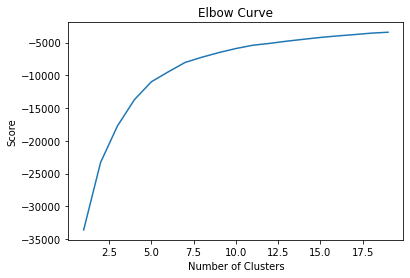

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#Comments: The elbow starts to flatten out 7.5 clusters

# K Means Algorithm

In [12]:
# Create k-means object
kmeans = KMeans(n_clusters =7) 

In [13]:
#Fit the k-means object to the data
kmeans.fit(df2)

KMeans(n_clusters=7)

In [14]:
df2['clusters'] = kmeans.fit_predict(df2)

In [15]:
df2.head()

Length     Width  7days_views  EUR_price  clusters
0 -1.275367 -1.345839     0.467748  -0.300320         0
1 -1.275367 -1.686893    -0.501178  -0.300181         0
2 -1.448520 -2.113211    -0.571761  -0.300323         0
3 -1.353286 -1.720999    -0.610262  -0.300286         0
4 -0.894431 -0.936574     2.059095  -0.300012         2

In [16]:
df2['clusters'].value_counts()

0    3427
3    3105
2     905
1     791
5      98
4      67
6       6
Name: clusters, dtype: int64

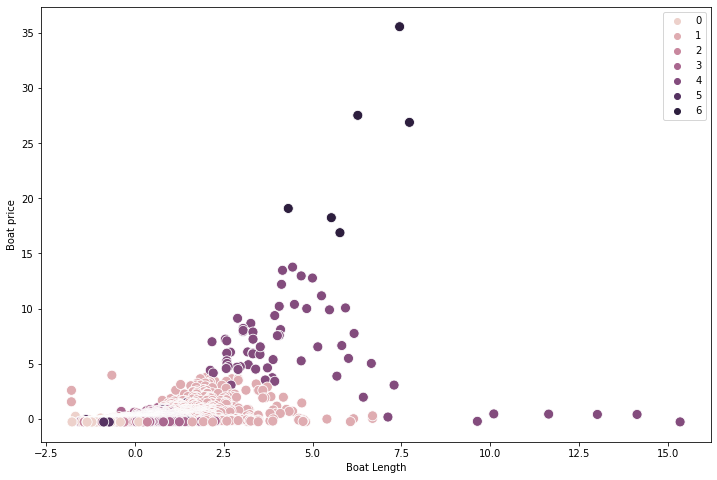

In [17]:
# Plot the clusters for the ":length" and "EUR_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Length'], y=df2['EUR_price'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Boat Length')
plt.ylabel('Boat price')
plt.show()

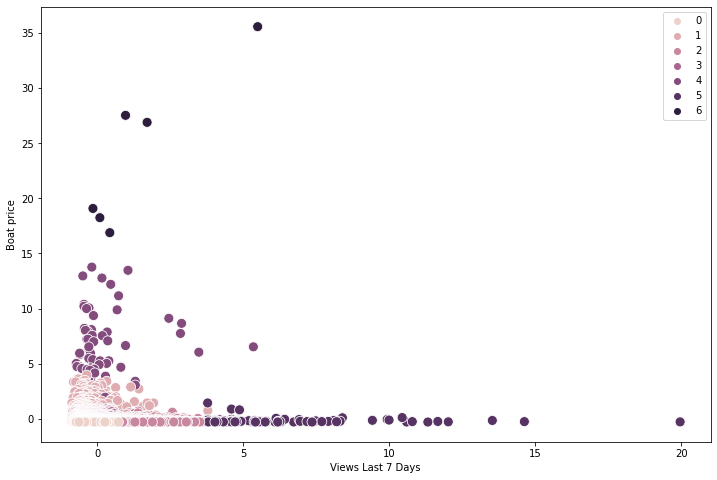

In [18]:
# Plot the clusters for the "7days_views" and "EUR_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['7days_views'], y=df2['EUR_price'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Views Last 7 Days')
plt.ylabel('Boat price')
plt.show()

#Comments:  The graphs do not necessarily tell me much.  Price does seem to, in general, correlate with length. However the number of views in last 7 days does not necesarily correlate with price.  This would suggest further investigation is necessary.

In [19]:
df2

Length     Width  7days_views  EUR_price  clusters
0    -1.275367 -1.345839     0.467748  -0.300320         0
1    -1.275367 -1.686893    -0.501178  -0.300181         0
2    -1.448520 -2.113211    -0.571761  -0.300323         0
3    -1.353286 -1.720999    -0.610262  -0.300286         0
4    -0.894431 -0.936574     2.059095  -0.300012         2
...        ...       ...          ...        ...       ...
8394 -0.929062 -1.584577     0.865585  -0.298434         2
8395 -0.877116 -0.885416     6.178632  -0.298492         5
8396 -1.206106 -1.431102     1.289088  -0.299013         2
8397 -1.211300 -1.354365     0.724417  -0.299243         0
8398 -1.344628 -1.601630     0.262413  -0.299802         0

[8399 rows x 5 columns]

In [20]:
df2.loc[df2['clusters'] == 6, 'clusters'] = 'Deep purple'
df2.loc[df2['clusters'] == 5, 'clusters'] = 'Dark purple'
df2.loc[df2['clusters'] == 4, 'clusters'] = 'Violet'
df2.loc[df2['clusters'] == 3, 'clusters'] = 'Lavendar'
df2.loc[df2['clusters'] == 2, 'clusters'] = 'Dark rose'
df2.loc[df2['clusters'] == 1, 'clusters'] = 'Light rose'
df2.loc[df2['clusters'] == 0, 'clusters'] = 'Light pink'

In [21]:
df2.groupby('clusters').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         '7days_views':['mean', 'median'],
                          'EUR_price':['mean', 'median']})

Length               Width           7days_views            \
                 mean    median      mean    median        mean    median   
clusters                                                                    
Dark purple -0.457927 -0.643360 -0.482241 -0.778836    6.013237  4.856787   
Dark rose   -0.524263 -0.584488 -0.602237 -0.757520    1.470430  1.263421   
Deep purple  6.178856  6.023019  4.750508  4.750508    1.422770  0.698750   
Lavendar     0.312216  0.283007  0.483616  0.453223   -0.308490 -0.385676   
Light pink  -0.657002 -0.669333 -0.746284 -0.791626   -0.214949 -0.270175   
Light rose   1.833709  1.675155  1.737038  1.570176   -0.314736 -0.449844   
Violet       4.685298  3.867268  3.666769  3.301027    0.221997 -0.173925   

             EUR_price             
                  mean     median  
clusters                           
Dark purple  -0.187994  -0.259500  
Dark rose    -0.214904  -0.254444  
Deep purple  24.039053  22.992394  
Lavendar     -0.050884  -0.101642  
Light pink   -0.232431  -0.248656  
Light rose    0.773659   0.558188  
Violet        6.138018   5.946796

#Comments:  The deep purple cluster hasthe best stats, followed by the dark rose.  The deep purple clusters seem to make sense that the length and width of the boat (the bigger the boat) are in line with the price of the boat being more costly.  Other areas need to be explored further as this has not provided enough insight at this time.